# Primeiro Hands-on: Linear Regression

## Objetivo

Compreender os princípios básicos do aprendizado de máquina juntamente com sua terminologia básica.

## Regressão Linear

A regressão linear é uma técnica muito simples para aproximação de funções a partir do seguinte cenário:

* Uma das variáveis aleatórias deve ser a variável de interesse, ou seja, aquela que se deseja estimar. Tal variável é conhecida como dependente, ou _resposta_.
* O restante das variáveis são consideradas variáveis independentes, ou _regressoras_, as quais possuem a função de explicar o valor assumido pela _resposta_.
* A dependência entre a resposta e os regressores deve incluir um termo aditivo de erro para levar em conta a incerteza presente na maneira como a dependência é formulada.

Quem são as variáveis dependentes e independentes?

Elas  possuem valores nos exemplos fornecidos pelo _dataset_ em questão. Por exemplo, seja o _dataset_ que possui as colunas metadados idade, sexo, tempo de CNH, renda, valor do veículo, valor do seguro, podemos considerar como variável dependente (_resposta_) **valor do seguro** e variáveis independentes (_regressoras_) **sexo**, **tempo de CNH**, **renda**, **valor do veículo**.

Vale lembrar que o problema de regressão é uma aproximação de função na forma:

\begin{equation}
f: \mathbb{R}^n\rightarrow \mathbb{R}
\end{equation}

Sendo assim, matematicamente, a regressão linear é da forma:

\begin{equation}
d' = \mathbf{w}^T\mathbf{x} 
\end{equation}

Onde $d'$ é a resposta referente à variável dependente apresentada pela função, $\mathbf{x}$ é o vetor regressor dado por:

\begin{equation}
\mathbf{x} = [x_1,x_2, \dots, x_m]^T
\end{equation}

Podemos reescrever $d' = \mathbf{w}^T\mathbf{x}$  de outra forma ressaltando o produto escalar:

\begin{equation}
d' = \sum_i w_ix_i
\end{equation}

O vetor $\mathbf{w}$ define os pesos, os quais são parâmetros de vão modular a influência das variáveis independentes (regressoras) na variável dependente (resposta).

No caso do _dataset_ apresentado anteriormente $\mathbf{x}$ seria formado pelos valores das colunas idade, sexo, tempo de CNH, renda, valor do veículo, já a coluna valor do seguro seria a variável $d$. 

Portanto, esse problema de regressão visaria aproximar a função, de maneira linear, que descreve o valor do seguro a partir dos outros valores. Como possuímos alguns valores para $\mathbf{x}$ e $d$ no _dataset_ em questão vamos usa-los para aproximar a função desconhecida.

A seguir vamos criar um _dataset_ de uma função conhecida, a qual não necessitaria de aproximação, mas que é muito útil por motivos didáticos e irá fornecer uma ideia de como a regressão.

In [0]:
# importações necessárias
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# função que cria o dataset
def createDS(n = 50):
  h = np.linspace(1.3,2.1,n)
  w = np.linspace(20.0,140.0,n)
  return np.array([h,w,w/(h*h)]).T

In [8]:
# criando o dataset em questão contendo os pontos
dataset = createDS(20)
dataset

array([[  1.3       ,  20.        ,  11.83431953],
       [  1.34210526,  26.31578947,  14.60976547],
       [  1.38421053,  32.63157895,  17.03075077],
       [  1.42631579,  38.94736842,  19.14461949],
       [  1.46842105,  45.26315789,  20.99150833],
       [  1.51052632,  51.57894737,  22.60559191],
       [  1.55263158,  57.89473684,  24.01608733],
       [  1.59473684,  64.21052632,  25.24806936],
       [  1.63684211,  70.52631579,  26.32313562],
       [  1.67894737,  76.84210526,  27.25995224],
       [  1.72105263,  83.15789474,  28.07470378],
       [  1.76315789,  89.47368421,  28.78146581],
       [  1.80526316,  95.78947368,  29.39251502],
       [  1.84736842, 102.10526316,  29.91858832],
       [  1.88947368, 108.42105263,  30.36910018],
       [  1.93157895, 114.73684211,  30.75232573],
       [  1.97368421, 121.05263158,  31.07555556],
       [  2.01578947, 127.36842105,  31.34522698],
       [  2.05789474, 133.68421053,  31.5670358 ],
       [  2.1       , 140.     

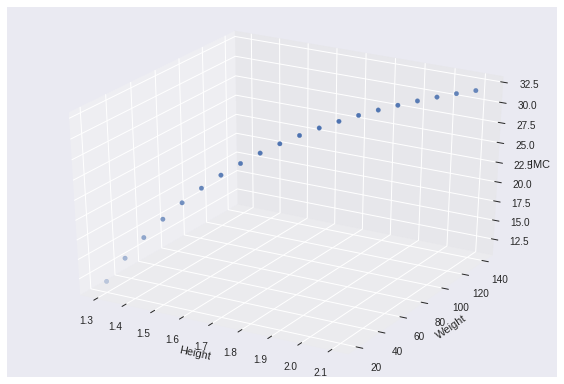

In [6]:
# visualizando o espaço do dataset
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset[:,0],dataset[:,1],dataset[:,2])
ax.set_ylabel('Weight')
ax.set_xlabel('Height')
ax.set_zlabel('IMC')
plt.tight_layout()

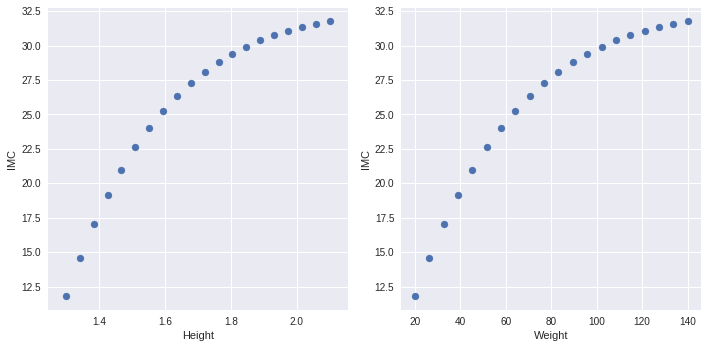

In [7]:
# visualizando o dataset em 2D
_, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].scatter(dataset[:,0],dataset[:,2])
ax[0].set_xlabel('Height')
ax[0].set_ylabel('IMC')

ax[1].scatter(dataset[:,1],dataset[:,2])
ax[1].set_xlabel('Weight')
ax[1].set_ylabel('IMC')

plt.tight_layout()

Podemos aproximar a função anterior usando o _dataset_ disponível, uma vez que tal _dataset_ nós fornecerá $\mathbf{x}$ e seu respectivo $d$. Para isso devemos determinar $\mathbf{w}$, e inicialmente faremos isso de forma arbitrária.

In [0]:
# definindo a regressão
def linear_regression(w,points):
  ds = np.array([])
  for lin in points:
    x = lin
    d = np.dot(w,x)
    ds = np.append(ds, d)
  return ds

In [0]:
# aproximando a função com um valor arbitrário para w
w = np.random.rand(2)
ds = linear_regression(w,dataset[:,0:2])

Após a aproximação podemos visualizar a mesma confrontada com os pontos gerados a partir da função real.

In [0]:
# cria função para visualizar função real versus aproximada
def visualizeRegressionXTrue(truef,regr):
  _, ax = plt.subplots(1, 2, figsize=(10,5))

  ax[0].scatter(regr[:,0],regr[:,2],label='Regression')
  ax[0].scatter(truef[:,0],truef[:,2],label='True Function')
  ax[0].set_xlabel('Height')
  ax[0].set_ylabel('IMC')
  ax[0].legend()

  ax[1].scatter(regr[:,1],regr[:,2],label='Regression')
  ax[1].scatter(truef[:,1],truef[:,2],label='True Function')
  ax[1].set_xlabel('Weight')
  ax[1].set_ylabel('IMC')
  ax[1].legend()
  
  plt.tight_layout()

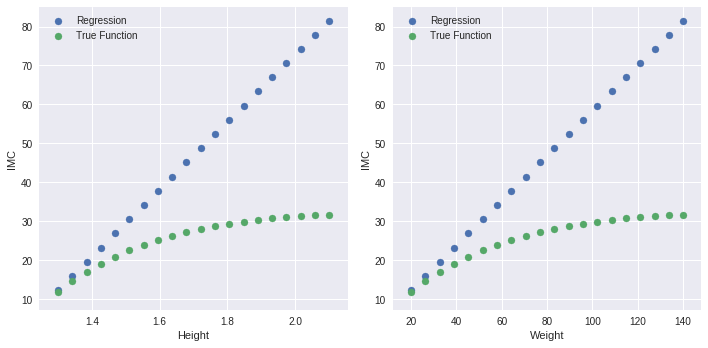

In [12]:
visualizeRegressionXTrue(dataset,np.c_[dataset[:,0:2],ds])

É possível perceber que estimar arbitrariamente valores para  $\mathbf{w}$ pode não ser uma estratégia eficaz. Existem diversas estratégias para encontrar um valor satisfatório para $\mathbf{w}$. Entre elas podemos citar o algoritmo **Least Mean Square**. 

###Algoritmo Least Mean Square (LSM)

Este algoritmo foi desenvolvido por Widrow e Hoff em 1960, e foi influenciado por um modelo de neurônio chamado _Perceptron_ proposto por Rosenblatt na década de 50.

Antes de prosegguir é necessário que se estabeleça o quanto uma aproximação (regressão) está "errada". No caso da regressão linear podemos usar a seguinte função de erro:

\begin{equation}
e(n) = d(n) - \mathbf{x}^T(n)\mathbf{w}(n) 
\end{equation}

Ou seja, para cada par $n$ ($\mathbf{x}^T,d$) é possível verificar a distância entre cada um e o resultado de sua aproximação.

Voltando ao algoritmo LSM, o mesmo serve para minimizar uma função de erro (custo), a saber:

\begin{equation}
\mathcal{E}(\mathbf{w}) = \frac{1}{2}e^2(n) 
\end{equation}

Derivando essa função temos,

\begin{equation}
\frac{\partial\mathcal{E}(\mathbf{w})}{\partial\mathbf{w}} = e(n)\frac{\partial e(n)}{\partial\mathbf{w}}
\end{equation}

Derivando a função de erro $e(n) = d(n) - \mathbf{x}^T(n)\mathbf{w}(n)$ estabelecida para a regressão linear, temos:

\begin{equation}
\frac{\partial e(n)}{\partial\mathbf{w}} = -\mathbf{x}(n)
\end{equation}

E portanto,

\begin{equation}
\frac{\partial\mathcal{E}(\mathbf{w})}{\partial\mathbf{w}} = - e(n)\mathbf{x}(n)
\end{equation}

Aplicando o resultado imediatamente acima à função do gradiente temos que o algoritmo LSM usa a equação abaixo:

\begin{equation}
\mathbf{w}(n + 1) = \mathbf{w}(n) + \eta\mathbf{x}(n)e(n)
\end{equation}

Abaixo temos uma representação gráfica da aplicação sucessiva da equação do LSM:


![](https://www.phy.ornl.gov/csep/gif_figures/mof2.9.gif =350x)

Sendo assim, podemos traduzir o LSM no seguinte pseudo-código:


_Training Sample:_ 
  * Input vector = $\mathbf{x}(n)$
  * Desired response = $d(n)$

_User selected parameter:_ $\eta$

_Initialization:_ $\mathbf{w}(0) = 0$

_Computation:_

For $n = 1, 2, 3, \dots $ samples, compute

  1. $e(n) = d(n) - \mathbf{x}^T(n)\mathbf{w}(n) $

  2. $\mathbf{w}(n + 1) = \mathbf{w}(n) + \eta\mathbf{x}(n)e(n)$









In [0]:
# aproximando uma função por LSM
def lsm_v1(dataset,eta=0.0001):
  w = np.zeros(2)
  errors = np.array([])

  for lin in dataset:
    x, d = lin[0:2], lin[2]
    e = d - np.dot(w,x)
    w = w + eta*x*e
    errors = np.append(errors,e)
  
  return w, errors

In [0]:
w, errors = lsm_v1(dataset,eta=0.00025)

Graficando o erro na fase de aproximação dos pontos.

In [0]:
def plotErrors(errors):
  plt.plot(errors)
  plt.xlabel("Iteration")
  plt.ylabel("Error")

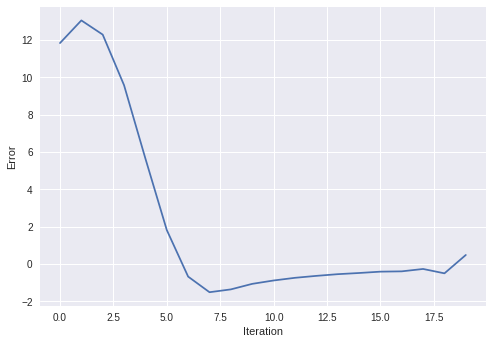

In [42]:
plotErrors(errors)

A seguir podemos testar se a aproximação, ou seja o vetor $\mathbf{w}$, está adequada à função real.

In [0]:
dl = linear_regression(w,dataset[:,:2])

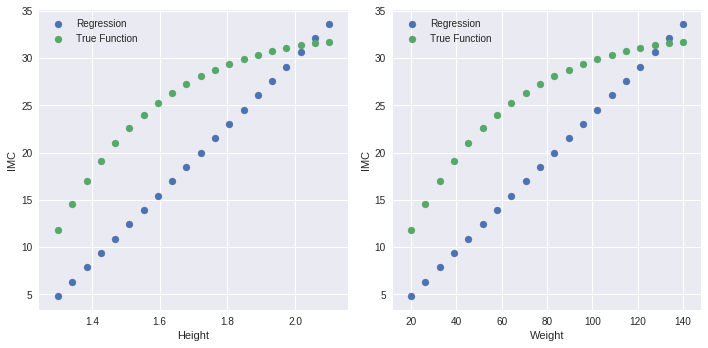

In [44]:
visualizeRegressionXTrue(dataset,np.c_[dataset[:,0:2],dl])

Teste a aproximação acima com vários valores para $\eta$.

###Exercício

1. Aproxime a função abaixo usando regressão linear.

\begin{equation}
y = x + cos(x)
\end{equation}

onde $x = [-4,4]$